In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import sklearn
from sklearn.model_selection import train_test_split
import os


from nltk.corpus import wordnet
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     /storage-1T/home/yunrui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /storage-1T/home/yunrui/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /storage-1T/home/yunrui/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
def data_cleaning(text):
    # 大小写
    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')
    text = text.replace('\t', ' ')
    text = text.replace("#" , " ")
    text = text.replace("." , "")
    text = text.replace("%", "")



    text = re.sub('https?://[A-Za-z0-9./]+', '', text)
    text = re.sub('http?://[A-Za-z0-9./]+', '', text)
    text = re.sub('www.[A-Za-z0-9./]+', '', text)
    text = re.sub("\d+", "", text)
    text = re.sub("!+", "!", text)

#     text = '!'.join(unique_list(text.split('!')))
    text = re.sub(r'((\b\w+\b.{1,2}\w+\b)+).+\1', r'\1', text, flags = re.I)
    encoded_string = text.encode("ascii", "ignore")
    decode_string = encoded_string.decode()
    return decode_string

In [3]:
!pwd
data_folder_path = './data/'
df = pd.read_csv(data_folder_path + 'train.csv')
test_text = pd.read_csv(data_folder_path + 'test.csv')
test_label = pd.read_csv(data_folder_path + 'test_labels.csv')
test_df = pd.concat([test_text, test_label], axis=1)
classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

/storage-6T/yunrui/comp9444/toxic-comment-classification


In [4]:
df['comment_text'] = df['comment_text'].apply(data_cleaning)
test_df['comment_text'] = test_df['comment_text'].apply(data_cleaning)

In [5]:
toxic_df = df[(df['toxic'] == 1) | (df['severe_toxic'] == 1) | (df['obscene'] == 1) | (df['threat'] == 1) | (df['insult'] == 1) | (df['identity_hate'] == 1)]
non_toxic_df = df[(df['toxic'] == 0) & (df['severe_toxic'] == 0) & (df['obscene'] == 0) & (df['threat'] == 0) & (df['insult'] == 0) & (df['identity_hate'] == 0)]

replacement_rate =0.7
##  synonym replacement
aug_toxic_df = toxic_df.copy(True)
for i, row in toxic_df.iterrows():
    comment = row['comment_text']
    words = comment.split()
    new_comment = ''
    new_words = []
    for word in words:
        if word in stopwords.words('english'):
            new_words.append(word)
            continue

        random_rate = np.random.uniform(0, 1)

        if random_rate < replacement_rate:
            synonyms = []
            for syn in wordnet.synsets(word):
                for l in syn.lemmas():
                    synonyms.append(l.name())
            if len(synonyms) > 0:
                new_word = synonyms[np.random.randint(0, len(synonyms))]
                new_words.append(new_word)
            else:
                new_words.append(word)


        else:
            new_words.append(word)
    new_comment = ' '.join(new_words)
    new_row = row.copy(True)
    new_row['comment_text'] = new_comment
    aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
    
df = pd.concat([aug_toxic_df, non_toxic_df], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug_toxic_df = aug_toxic_df.append(new_row, ignore_index=True)
/tmp/ipykernel_15179/3531218225.py:36: FutureWarning

In [6]:
df

id                                       comment_text  \
0       f649ed5944d1ae27  Blotto adrift - admit when you make a mistake ...   
1       6ca25431d68164f6  Help! I just created this page and on related ...   
2       e784284c6df92411  I concur, absent anyone willing to do a re-wri...   
3       34200e92b23cc594  Mistery seems solved: purpurin glicoside in th...   
4       34ee6477ccd569e9  straight_off you've done it They should have e...   
...                  ...                                                ...   
175791  717c55fa82f0edc6                          start nooky urself mmmkk?   
175792  a51361093d3517b9  "However alerting all who participated in the ...   
175793  cd50a80eea9b7ae6  supposition WHAT? YOUR ease A dirty LITTLE COC...   
175794  e3f15df896997d49                   However inactive, I'm still here   
175795  b2d0d32f5f9ef7c9  You obviously have a penile job think too much...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
0           0             0        0       0       0              0  
1           0             0        0       0       0              0  
2           0             0        0       0       0              0  
3           0             0        0       0       0              0  
4           0             0        1       0       0              0  
...       ...           ...      ...     ...     ...            ...  
175791      1             1        1       0       0              0  
175792      0             0        0       0       0              0  
175793      1             1        1       0       1              0  
175794      0             0        0       0       0              0  
175795      1             0        0       0       1              0  

[175796 rows x 8 columns]

In [7]:
test_df[0:20]
ids_to_drop = []
for i in range(len(test_df)):
    if test_df['toxic'][i] == -1 or test_df['severe_toxic'][i] == -1 or test_df['obscene'][i] == -1 or test_df['threat'][i] == -1 or test_df['insult'][i] == -1 or test_df['identity_hate'][i] == -1:
        ids_to_drop.append(i)

test_df = test_df.drop(ids_to_drop)

test_df.head()

id                                       comment_text  \
5   0001ea8717f6de06  Thank you for understanding I think very highl...   
7   000247e83dcc1211                    :Dear god this site is horrible   
11  0002f87b16116a7f  "::: Somebody will invariably try to add Relig...   
13  0003e1cccfd5a40a  "    It says it even in Binghamton University,...   
14  00059ace3e3e9a53  "    == Before adding a new product to the lis...   

                  id  toxic  severe_toxic  obscene  threat  insult  \
5   0001ea8717f6de06      0             0        0       0       0   
7   000247e83dcc1211      0             0        0       0       0   
11  0002f87b16116a7f      0             0        0       0       0   
13  0003e1cccfd5a40a      0             0        0       0       0   
14  00059ace3e3e9a53      0             0        0       0       0   

    identity_hate  
5               0  
7               0  
11              0  
13              0  
14              0

In [8]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

In [9]:
from torchtext.vocab import GloVe, vocab

unk_token = "<pad>"
unk_index = 0
#name = "vector_cache"


if os.path.isdir("./.vector_cache"):
    glove_vectors = GloVe(name = 'twitter.27B', cache = './.vector_cache', dim=200)
else:    
    glove_vectors = GloVe('twitter.27B', dim=200)
print(len(glove_vectors.stoi))
glove_vocab = vocab(glove_vectors.stoi)
glove_vocab.insert_token("<pad>",unk_index)
#this is necessary otherwise it will throw runtime error if OOV token is queried
glove_vocab.set_default_index(unk_index)
pretrained_embeddings = glove_vectors.vectors
pretrained_embeddings = torch.cat((torch.zeros(1,pretrained_embeddings.shape[1]),pretrained_embeddings))
print(pretrained_embeddings.shape)


1193514
torch.Size([1193515, 200])


In [10]:
from torch.utils.data import IterableDataset

tokenizer = get_tokenizer("basic_english")


class MyDataset(Dataset):

    def __init__(self, dataframe, max_len=100, pad_token='<pad>'):
         self.X = dataframe['comment_text'].values
         self.Y = dataframe[classes].to_numpy()
         self.max_len = max_len
         self.pad_token = pad_token
         # self.unk_token = unk_token

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        t = idx
        tokens = tokenizer(self.X[t])[:self.max_len]

        diff = self.max_len - len(tokens)
        # print('diff',diff)
        if diff > 0:
            tokens = [self.pad_token] * diff + tokens
            # print('tokens',to
        indices = glove_vocab(tokens)
        result = {
            'text': tokens,
            'indices': torch.tensor(indices),
            'labels': torch.tensor(self.Y[t], dtype=torch.float)
        }
        return result


In [11]:
MAX_LEN = 0
for a in range(0 , len(df)):
    f = df["comment_text"][a]
    length = len(f.split())
    if length > MAX_LEN:
        MAX_LEN = length
        
train_dataset = MyDataset(df, MAX_LEN)
test_dataset = MyDataset(test_df, MAX_LEN)

In [12]:
MAX_LEN

265

In [13]:
for data in test_dataset:
    print(data['text'])
    print(data['labels'])
    print(data['indices'])
    break

['<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', 

In [14]:


class TextClassificationModel(nn.Module):

    def __init__(self, pretrained_embeddings, num_class, hidden_size, freeze_embeddings = True):
        super(TextClassificationModel, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding.from_pretrained(pretrained_embeddings, freeze = freeze_embeddings, sparse=False)

        # print(pretrained_embeddings.shape)

        self.lstm = nn.LSTM(pretrained_embeddings.shape[1], hidden_size, num_layers=2, bidirectional=True, dropout=0.5)
        self.fc1 = nn.Linear(hidden_size * 4, hidden_size * 2)
        self.fc2 = nn.Linear(hidden_size * 2, num_class)
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.2)
        
        self.LN = nn.LayerNorm(hidden_size * 4)

    #def attention_net(self, lstm_output):
    #    attn_weight_matrix = self.W_s2(torch.tanh(self.W_s1(lstm_output)))
    #    attn_weight_matrix = attn_weight_matrix.permute(0, 2, 1)
    #    attn_weight_matrix = nn.functional.softmax(attn_weight_matrix, dim=2)
    #    return attn_weight_matrix

    def forward(self, indices):
        #print('input', indices.shape)

        embedded = self.embedding(indices.T)
        self.lstm.flatten_parameters()
        lstm_out, _ = self.lstm(embedded)

        encoding = torch.cat((lstm_out[0], lstm_out[-1]), dim=1)
        
        out = self.LN(encoding)
        out = self.fc1(encoding)
        out = self.dropout(out)
        out = self.fc2(out)

        #print('output', out.shape)


        #out = self.sigmoid(out)
        #print('out', out)

        return out

In [15]:
train_dataset

In [16]:
## OK let's try to run this model to see if dimensions are correct!
#glove_model = TextClassificationModel(pretrained_embeddings, len(classes), hidden_size=64, is_batch=False)

#for idx, data in enumerate(train_dataset):
#    print("---------------------------------")
#    print('next example id ', idx)
#    print("---------------------------------")
#    # example_text = data['text']
#    text_input = data['indices']
    # print('tensor_shape: ', text_input.shape)
#    model_output = glove_model(text_input)
    # fwd = glove_model.forward(text_input)
    # print('embedding_bag: ',  fwd.shape)
    # print('output_shape: ', model_output.shape)
#    print('output: ', model_output)

    #if idx == 2:
#    break

In [17]:
from torch.utils.data import DataLoader


BATCH_SIZE = 3072

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [18]:
from torch.optim import AdamW
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
torch.set_grad_enabled(True)
loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight = torch.tensor((159571 - 35098) / 35098))


Epoch: 10 Train_Loss: 0.170695875225396 Train_Accuracy: 0.963938295841217
Epoch: 10 Test_Loss: 0.182714602067357 Test_Accuracy: 0.960418701171875 Recall: 0.7345151055317974


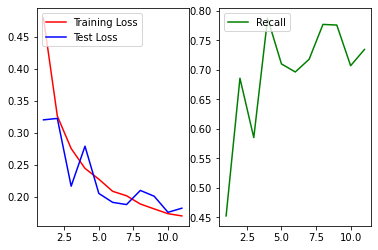

In [ ]:
from IPython.display import clear_output
model = TextClassificationModel(pretrained_embeddings, len(classes), hidden_size=128)
gpus = torch.cuda.device_count()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

if gpus > 1:
    print("Let's use", gpus, "GPUs!")
    model = torch.nn.DataParallel(model)    # multi-gpu

loss_fn.to(device)
model.to(device)
optimizer = AdamW(model.parameters(), lr=0.001, weight_decay=0.0001)

epochs = 100

training_losses = [ None for i in range(epochs)]
test_losses = [ None for i in range(epochs)]
epoch_count = [i for i in range(1, epochs+1)]
recalls = [ None for i in range(epochs)]
for e in range(epochs):
    model.train()
    epoch_loss = 0

    losses = []
    correct_predictions = 0
    for batch_id, batch in enumerate(train_dataloader):

        ids = batch['indices'].to(device)
        #print('ids: ', ids.shape)
        labels = batch['labels'].to(device)
        optimizer.zero_grad()
        outputs = model(ids)
        #print('outputs: ', outputs)
        preds = torch.where(outputs > 0.5, 1, 0)
        loss = loss_fn(outputs, labels)

        correct_predictions += torch.sum(preds == labels)

        loss.backward()
        optimizer.step()
        # if batch_id % 100 == 0:
            # print('Epoch: {} Batch: {} Loss: {}'.format(e, batch_id, loss.item()))
            #print(loss.grad_fn)

        losses.append(loss.item())

    epoch_loss = np.mean(losses)

    training_losses[e] = epoch_loss
    train_accuracy = correct_predictions/(len(df)*6)


    if e % 3000 == 0 and e != 0:
        torch.save(model.state_dict(), 'model_epoch_{}.pt'.format(e))

    ## Evaluate on test set
    with torch.no_grad():
        model.eval()
        test_loss = []
        test_correct_predictions = 0
        label_counter = 0
        pred_counter = 0

        for batch_id, batch in enumerate(test_dataloader):
            ids = batch['indices'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(ids)
            # print(outputs)

            preds = torch.where(outputs > 0.5, 1, 0)
            loss = loss_fn(outputs, labels)

            test_correct_predictions += torch.sum(preds == labels)
            test_loss.append(loss.item())

            labels = labels.to(torch.device("cpu")).numpy()
            preds = preds.to(torch.device("cpu")).numpy()
            for row in range(len(labels)):
                for col in range(len(labels[row])):
                    if labels[row][col] == 1:
                        label_counter += 1
                        if preds[row][col] == 1:
                            pred_counter += 1
        # print(pred_counter, label_counter)
        test_loss = np.mean(test_loss)
        accuracy = test_correct_predictions/(len(test_dataset)*6)
        recall_score = pred_counter / label_counter
        recalls[e] = recall_score
        test_losses[e] = test_loss

        clear_output()
        print('Epoch: {} Train_Loss: {} Train_Accuracy: {}'.format(e, epoch_loss, train_accuracy))
        print('Epoch: {} Test_Loss: {} Test_Accuracy: {} Recall: {}'.format(e, test_loss, accuracy, recall_score))
        fig, (ax1, ax2) = plt.subplots(1, 2)

        ax1.plot(epoch_count, training_losses, 'r', label='Training Loss')
        ax1.plot(epoch_count, test_losses, 'b', label='Test Loss')
        ax1.legend(loc="upper left")


        ax2.plot(epoch_count, recalls, 'g', label='Recall')
        ax2.legend(loc="upper left")

        plt.show()



